In [1]:
from  fiona import listlayers

iranMapsLink='https://github.com/SeaWaterProject/Japan/raw/main/maps/iranMaps_3387.gpkg'

#layers in maps
listlayers(iranMapsLink)

['country', 'cities', 'rivers', 'centroid', 'airports']

In [2]:
import geopandas as gpd

airports=gpd.read_file(iranMapsLink,layer='airports')
rivers=gpd.read_file(iranMapsLink,layer='rivers')
cities=gpd.read_file(iranMapsLink,layer='cities')

In [3]:
import pandas as pd 

portsFileLink="https://github.com/CienciaDeDatosEspacial/GeoDataFrame_Analytics/raw/main/data/UpdatedPub150.csv"
infoseaports=pd.read_csv(portsFileLink)

#columns available (so many)
infoseaports.columns.to_list()

['World Port Index Number',
 'Region Name',
 'Main Port Name',
 'Alternate Port Name',
 'UN/LOCODE',
 'Country Code',
 'World Water Body',
 'IHO S-130 Sea Area',
 'Sailing Direction or Publication',
 'Publication Link',
 'Standard Nautical Chart',
 'IHO S-57 Electronic Navigational Chart',
 'IHO S-101 Electronic Navigational Chart',
 'Digital Nautical Chart',
 'Tidal Range (m)',
 'Entrance Width (m)',
 'Channel Depth (m)',
 'Anchorage Depth (m)',
 'Cargo Pier Depth (m)',
 'Oil Terminal Depth (m)',
 'Liquified Natural Gas Terminal Depth (m)',
 'Maximum Vessel Length (m)',
 'Maximum Vessel Beam (m)',
 'Maximum Vessel Draft (m)',
 'Offshore Maximum Vessel Length (m)',
 'Offshore Maximum Vessel Beam (m)',
 'Offshore Maximum Vessel Draft (m)',
 'Harbor Size',
 'Harbor Type',
 'Harbor Use',
 'Shelter Afforded',
 'Entrance Restriction - Tide',
 'Entrance Restriction - Heavy Swell',
 'Entrance Restriction - Ice',
 'Entrance Restriction - Other',
 'Overhead Limits',
 'Underkeel Clearance Manage

In [21]:
#EXERCISE 1

#rename
infoseaports.rename(columns={'Main Port Name':'portName'},inplace=True)
#keep few columns
infoseaports=infoseaports.loc[:,['portName', 'Country Code','Latitude', 'Longitude']]

# we have now
infoseaports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3739 entries, 0 to 3738
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   portName      3739 non-null   object 
 1   Country Code  3739 non-null   object 
 2   Latitude      3739 non-null   float64
 3   Longitude     3739 non-null   float64
dtypes: float64(2), object(2)
memory usage: 117.0+ KB


In [5]:
# some rows
infoseaports.head()

,portName,Country Code,Latitude,Longitude
0,Maurer,United States,40.533333,-74.250000
1,Mangkasa Oil Terminal,Indonesia,-2.733333,121.066667
2,Iharana,Madagascar,-13.350000,50.000000
3,Andoany,Madagascar,-13.400000,48.300000
4,Chake Chake,Tanzania,-5.250000,39.766667


In [6]:
#spatial points (unprojected)
seaports=gpd.GeoDataFrame(data=infoseaports.copy(),
                           geometry=gpd.points_from_xy(infoseaports.Longitude,
                                                       infoseaports.Latitude), 
                          crs=4326)# notice it is unprojected

# keep Brazil
seaports_ir=seaports[seaports['Country Code']=='Iran'].copy()

# reset indexes
seaports_ir.reset_index(drop=True, inplace=True)

# reprojecting
seaports_ir_3387=seaports_ir.to_crs(3387) # projected crs

<Axes: >

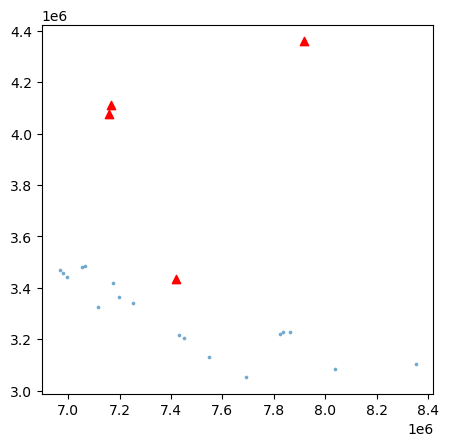

In [7]:
# subsetting
largeAirports=airports[airports['kind']=='large_airport'] #can't use "airports.type"
largeAirports.reset_index(drop=True, inplace=True)

#plotting
base=largeAirports.plot(color='red',marker="^")
seaports_ir_3387.plot(ax=base,alpha=0.5,markersize=3)

In [8]:
seaports_ir_3387.head()

,portName,Country Code,Latitude,Longitude,geometry
0,Bandar Taheri Offshore Terminal,Iran,27.650000,52.350000,POINT (7430368.335 3214840.792)
1,Barkan Oil-loading Terminal,Iran,29.733333,50.166667,POINT (7173556.611 3417378.811)
2,Bandar-E Pars Terminal,Iran,27.533333,52.533333,POINT (7451252.687 3204543.036)
3,Kharg Island Oil Terminal,Iran,29.233333,50.333333,POINT (7198768.517 3363189.414)
4,Bandar-E Mahshahr,Iran,30.466667,49.183333,POINT (7064308.101 3485841.622)


In [9]:
largeAirports.head()

,name,kind,latitude_deg,longitude_deg,elevation_ft,region_name,municipality,geometry
0,Imam Khomeini International Airport,large_airport,35.416100,51.152199,3305.0,Tehran Province,Tehran,POINT (7157677.006 4076061.419)
1,Mehrabad International Airport,large_airport,35.689201,51.313400,3962.0,Tehran Province,Tehran,POINT (7166626.498 4109683.854)
2,Shiraz Shahid Dastghaib International Airport,large_airport,29.539200,52.589802,4927.0,Fars Province,Shiraz,POINT (7418005.291 3434879.272)
3,Mashhad International Airport,large_airport,36.235199,59.640999,3263.0,Razavi Khorasan Province,Mashhad,POINT (7919324.875 4358753.145)


In [10]:
# distance between 'Guarulhos' and 'Dtse / Gegua Oil Terminal' 
largeAirports.iloc[0].geometry.distance(seaports_ir_3387.iloc[0].geometry)/1000  # in km

903.3612403067957

In [11]:
#try 1: default
seaports_ir_3387.geometry.apply\
(lambda g: largeAirports.geometry.distance(g)/1000)

,0,1,2,3
0,903.361240,932.900779,220.385520,1244.031338
1,658.873995,692.339729,245.074322,1200.981241
2,919.636327,948.837167,232.723379,1245.508952
3,714.055326,747.186094,230.660353,1228.962411
4,597.559337,632.177337,357.349777,1221.895335
5,739.749215,772.050649,189.090560,1215.219878
6,1538.906947,1553.499564,990.167871,1326.037333
7,637.090808,671.852391,452.185077,1303.837030
8,604.197990,638.859441,365.808063,1232.079027
9,643.323430,678.108345,440.247565,1302.430654


In [12]:
# try 2: see names (change indexes)

seaports_ir_3387.set_index('portName').geometry.apply\
(lambda g: largeAirports.set_index('name').geometry.distance(g)/1000)

name,Imam Khomeini International Airport,Mehrabad International Airport,Shiraz Shahid Dastghaib International Airport,Mashhad International Airport
portName,,,,
Bandar Taheri Offshore Terminal,903.361240,932.900779,220.385520,1244.031338
Barkan Oil-loading Terminal,658.873995,692.339729,245.074322,1200.981241
Bandar-E Pars Terminal,919.636327,948.837167,232.723379,1245.508952
Kharg Island Oil Terminal,714.055326,747.186094,230.660353,1228.962411
Bandar-E Mahshahr,597.559337,632.177337,357.349777,1221.895335
Bushehr,739.749215,772.050649,189.090560,1215.219878
Chah Bahar,1538.906947,1553.499564,990.167871,1326.037333
Khorramshahr,637.090808,671.852391,452.185077,1303.837030
Bandar Khomeyni,604.197990,638.859441,365.808063,1232.079027


In [13]:
#try 3: reorder previous output

seaports_ir_3387.set_index('portName').geometry.apply\
(lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)

name,Imam Khomeini International Airport,Mashhad International Airport,Mehrabad International Airport,Shiraz Shahid Dastghaib International Airport
portName,,,,
Abadan,643.323430,1302.430654,678.108345,440.247565
Bandar Abbas,1086.256604,1133.507503,1107.257586,466.973334
Bandar Khomeyni,604.197990,1232.079027,638.859441,365.808063
Bandar Taheri Offshore Terminal,903.361240,1244.031338,932.900779,220.385520
Bandar-E Mahshahr,597.559337,1221.895335,632.177337,357.349777
Bandar-E Pars Terminal,919.636327,1245.508952,948.837167,232.723379
Bandar-E Shahid Reajie,1085.049482,1142.982072,1106.434859,459.519455
Barkan Oil-loading Terminal,658.873995,1200.981241,692.339729,245.074322
Bushehr,739.749215,1215.219878,772.050649,189.090560


In [14]:
distanceMatrixKM_sea_air= seaports_ir_3387.set_index('portName').geometry.apply\
                          (lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
                          sort_index(axis=0).sort_index(axis=1)

In [15]:
# the mean distance from a seaport to all the large airports (sorted)
distanceMatrixKM_sea_air.mean(axis=1).sort_values(ascending=True) #axis=0?

portName
Barkan Oil-loading Terminal         699.317322
Bandar-E Mahshahr                   702.245447
Bandar Khomeyni                     710.236130
Bushehr                             729.027575
Kharg Island Oil Terminal           730.216046
Abadan                              766.027499
Khorramshahr                        766.241326
Khosrowabad                         768.260236
Sirus Oil Terminal                  790.671012
Bandar Taheri Offshore Terminal     825.169719
Bandar-E Pars Terminal              836.676456
Jazireh-Ye Lavan Oil Terminal       920.429388
Bandar-E Shahid Reajie              948.496467
Bandar Abbas                        948.498757
Jazireh-Ye Hormoz                   963.175463
Jazireh-Ye Sirri                   1033.400228
Jask                               1165.549356
Chah Bahar                         1352.152929
dtype: float64

In [16]:
SomeStats=pd.DataFrame()
SomeStats['mean']=distanceMatrixKM_sea_air.mean(axis=1)
SomeStats['min']=distanceMatrixKM_sea_air.min(axis=1)
SomeStats['max']=distanceMatrixKM_sea_air.max(axis=1)

# see some
SomeStats.head(10)

,mean,min,max
portName,,,
Abadan,766.027499,440.247565,1302.430654
Bandar Abbas,948.498757,466.973334,1133.507503
Bandar Khomeyni,710.236130,365.808063,1232.079027
Bandar Taheri Offshore Terminal,825.169719,220.385520,1244.031338
Bandar-E Mahshahr,702.245447,357.349777,1221.895335
Bandar-E Pars Terminal,836.676456,232.723379,1245.508952
Bandar-E Shahid Reajie,948.496467,459.519455,1142.982072
Barkan Oil-loading Terminal,699.317322,245.074322,1200.981241
Bushehr,729.027575,189.090560,1215.219878


In [17]:
# farthest airport to each seaport
distanceMatrixKM_sea_air.idxmax(axis=1)

portName
Abadan                              Mashhad International Airport
Bandar Abbas                        Mashhad International Airport
Bandar Khomeyni                     Mashhad International Airport
Bandar Taheri Offshore Terminal     Mashhad International Airport
Bandar-E Mahshahr                   Mashhad International Airport
Bandar-E Pars Terminal              Mashhad International Airport
Bandar-E Shahid Reajie              Mashhad International Airport
Barkan Oil-loading Terminal         Mashhad International Airport
Bushehr                             Mashhad International Airport
Chah Bahar                         Mehrabad International Airport
Jask                               Mehrabad International Airport
Jazireh-Ye Hormoz                   Mashhad International Airport
Jazireh-Ye Lavan Oil Terminal       Mashhad International Airport
Jazireh-Ye Sirri                    Mashhad International Airport
Kharg Island Oil Terminal           Mashhad International Airport
K

In [18]:
# farthest seaport to each airport
distanceMatrixKM_sea_air.idxmax(axis=0)

name
Imam Khomeini International Airport                    Chah Bahar
Mashhad International Airport                    Jazireh-Ye Sirri
Mehrabad International Airport                         Chah Bahar
Shiraz Shahid Dastghaib International Airport          Chah Bahar
dtype: object

In [19]:
# closest airport to each seaport
distanceMatrixKM_sea_air.idxmin(axis=1)

portName
Abadan                             Shiraz Shahid Dastghaib International Airport
Bandar Abbas                       Shiraz Shahid Dastghaib International Airport
Bandar Khomeyni                    Shiraz Shahid Dastghaib International Airport
Bandar Taheri Offshore Terminal    Shiraz Shahid Dastghaib International Airport
Bandar-E Mahshahr                  Shiraz Shahid Dastghaib International Airport
Bandar-E Pars Terminal             Shiraz Shahid Dastghaib International Airport
Bandar-E Shahid Reajie             Shiraz Shahid Dastghaib International Airport
Barkan Oil-loading Terminal        Shiraz Shahid Dastghaib International Airport
Bushehr                            Shiraz Shahid Dastghaib International Airport
Chah Bahar                         Shiraz Shahid Dastghaib International Airport
Jask                               Shiraz Shahid Dastghaib International Airport
Jazireh-Ye Hormoz                  Shiraz Shahid Dastghaib International Airport
Jazireh-Ye Lavan Oi

In [20]:
# closest seaport to each airport
distanceMatrixKM_sea_air.idxmin(axis=0)

name
Imam Khomeini International Airport              Bandar-E Mahshahr
Mashhad International Airport                    Jazireh-Ye Hormoz
Mehrabad International Airport                   Bandar-E Mahshahr
Shiraz Shahid Dastghaib International Airport              Bushehr
dtype: object

In [22]:
#EXERCISE 2

rivers.head()

,NAME,SYSTEM,geometry
0,Shatt al Arab,Tigris/Euphrates,"MULTILINESTRING ((6910348.407 3528242.178, 691..."


In [23]:
#keep one:

rivers[rivers.NAME.str.contains('Shatt')]

,NAME,SYSTEM,geometry
0,Shatt al Arab,Tigris/Euphrates,"MULTILINESTRING ((6910348.407 3528242.178, 691..."


In [25]:
# distance from each airport to Rio Grande
rivers[rivers.NAME.str.contains('Shatt')].iloc[0].geometry.distance(largeAirports.set_index('name').geometry)/1000

name
Imam Khomeini International Airport               601.063522
Mehrabad International Airport                    635.415520
Shiraz Shahid Dastghaib International Airport     388.499649
Mashhad International Airport                    1283.761244
Name: geometry, dtype: float64

In [26]:
distanceMatrixKM_riv_air=rivers.set_index('NAME').geometry.apply\
(lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)
distanceMatrixKM_riv_air

name,Imam Khomeini International Airport,Mashhad International Airport,Mehrabad International Airport,Shiraz Shahid Dastghaib International Airport
NAME,,,,
Shatt al Arab,601.063522,1283.761244,635.41552,388.499649


In [28]:
distanceMatrixKM_riv_air.loc['Shatt al Arab'].sort_values()

name
Shiraz Shahid Dastghaib International Airport     388.499649
Imam Khomeini International Airport               601.063522
Mehrabad International Airport                    635.415520
Mashhad International Airport                    1283.761244
Name: Shatt al Arab, dtype: float64

In [29]:
!pip install mapclassify

In [30]:
base=largeAirports.explore(color='red',marker_kwds=dict(radius=10))
rivers[rivers.NAME.str.contains('Shatt')].explore(m=base)

In [31]:
rivers[~rivers.SYSTEM.isna()]

,NAME,SYSTEM,geometry
0,Shatt al Arab,Tigris/Euphrates,"MULTILINESTRING ((6910348.407 3528242.178, 691..."


In [32]:
systems=rivers.dissolve(by='SYSTEM')
systems

,geometry,NAME
SYSTEM,,
Tigris/Euphrates,"MULTILINESTRING ((6910348.407 3528242.178, 691...",Shatt al Arab


In [33]:
# format the GDF:

systems.reset_index(drop=False,inplace=True)
systems.drop(columns='NAME',inplace=True)

# we have
systems

,SYSTEM,geometry
0,Tigris/Euphrates,"MULTILINESTRING ((6910348.407 3528242.178, 691..."


In [34]:
distanceMatrixKM_sys_air=systems.set_index('SYSTEM').geometry.apply\
(lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)

distanceMatrixKM_sys_air

name,Imam Khomeini International Airport,Mashhad International Airport,Mehrabad International Airport,Shiraz Shahid Dastghaib International Airport
SYSTEM,,,,
Tigris/Euphrates,601.063522,1283.761244,635.41552,388.499649


In [35]:
mins=distanceMatrixKM_sys_air.idxmin(axis="columns") # same as axis=1
mins

SYSTEM
Tigris/Euphrates    Shiraz Shahid Dastghaib International Airport
dtype: object

In [37]:
# one of them
mins.iloc[0]

'Shiraz Shahid Dastghaib International Airport'

In [38]:
base=systems.explore()
# the closest
largeAirports[largeAirports.name.isin(mins)].explore(m=base,color='red',marker_kwds=dict(radius=10))
# NOT the closest
largeAirports[~largeAirports.name.isin(mins)].explore(m=base,color='blue',marker_kwds=dict(radius=5))

In [39]:
#EXERCISE 3

# polygon for each system
systems.convex_hull

0    POLYGON ((7029536.242 3430003.219, 6977302.340...
dtype: geometry

<Axes: >

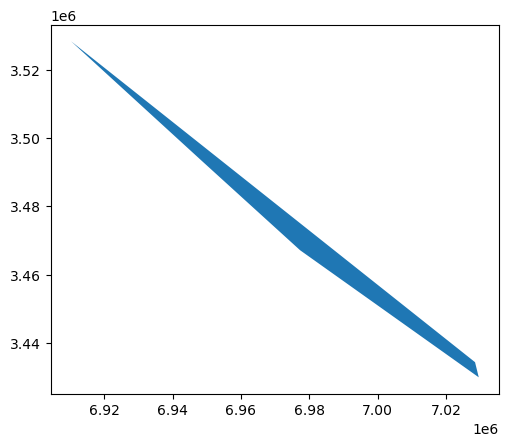

In [40]:
# see them
systems.convex_hull.plot()

In [42]:
systems_hulls=systems.convex_hull.to_frame()
systems_hulls['system']=['Tigris/Euphrates', 'Tigris/Euphrates']
systems_hulls.rename(columns={0:'geometry'},inplace=True)
systems_hulls=systems_hulls.set_geometry('geometry')
systems_hulls.crs="EPSG:3387"
systems_hulls

ValueError: Length of values (2) does not match length of index (1)

In [43]:
distanceMatrixKM_sysHull_air=systems_hulls.set_index('system').geometry.apply\
(lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)

distanceMatrixKM_sysHull_air

KeyError: "None of ['system'] are in the columns"

In [ ]:
mins=distanceMatrixKM_sysHull_air.idxmin(axis="columns")
mins

In [44]:
# plotting
base=systems_hulls.explore()
largeAirports[largeAirports.name.isin(mins)].explore(m=base,color='red',marker_kwds=dict(radius=10))
largeAirports[~largeAirports.name.isin(mins)].explore(m=base,color='blue',marker_kwds=dict(radius=5))

In [45]:
#EXERCISE 4

# remember:
distanceMatrixKM_riv_air

name,Imam Khomeini International Airport,Mashhad International Airport,Mehrabad International Airport,Shiraz Shahid Dastghaib International Airport
NAME,,,,
Shatt al Arab,601.063522,1283.761244,635.41552,388.499649


In [48]:
# getting a value (it can be any value)
distanceMatrixKM_riv_air.loc['Shatt al Arab'].min() # I chose min

388.49964918560994

In [53]:
minMts=distanceMatrixKM_riv_air.loc['Shatt al Arab'].min()*1000 # km

#the buffer is a polygon:
rivers[rivers.NAME=='Shatt al Arab'].buffer(distance = minMts)

0    POLYGON ((6669417.253 3223708.644, 6650175.468...
dtype: geometry

In [54]:
# see buffer:
bufferAroundAmazon=rivers[rivers.NAME=='Shatt al Arab'].buffer(distance = minMts)
bufferAsBase=bufferAroundAmazon.explore(color='red')
rivers[rivers.NAME=='Shatt al Arab'].explore(m=bufferAsBase,color='blue',style_kwds={'weight':0.5})

In [55]:
small_airports=airports[airports['kind']=='small_airport']

# plotting
rivers[rivers.NAME=='Shatt al Arab'].explore(m=bufferAsBase,color='blue',style_kwds={'weight':0.5})
small_airports.explore(m=bufferAsBase,color='black')

In [ ]:

riversWithinBuffer=small_airports.clip(mask=bufferAroundAmazon)
#
riversWithinBuffer

In [ ]:
# plotting the airports within buffer
bufferAsBase=bufferAroundAmazon.explore(color='red')
rivers[rivers.NAME=='Amazon'].explore(m=bufferAsBase,color='blue',style_kwds={'weight':0.5})
riversWithinBuffer.explore(m=bufferAsBase,color='black')

In [ ]:
# minimum of all the minimum by row
distanceMatrixKM_riv_air.min(axis=1).min() 

In [ ]:
# using the previous value
minMinMts_5=5*distanceMatrixKM_riv_air.min(axis=1).min()*1000


allMinBuffer=rivers.buffer(distance = minMinMts_5).explore(color='red')
rivers.explore(m=allMinBuffer,color='blue',style_kwds={'weight':0.5})